In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import erf

In [2]:
# Make a phase_field function solver
def phase_field(T, Phi, e, A, dx, dt, t, x):
    
    D2Phi = np.zeros([len(x), len(t)])  
    D2T = np.zeros([len(x), len(t)]) 
    
    for j in range(len(t) - 1):
        for i in range(len(x) - 2):
            # Solve for Phi
            D2Phi[i+1, j+1] = (6/(5*A))*(((Phi[i, j]-2*Phi[i+1, j]+Phi[i+2, j])/dx**2) \
                          - (1/e**2)*(Phi[i+1,j])*(1-Phi[i+1,j])*(1 - 2 * Phi[i+1,j] + A * T[i+1, j]))                                      
            Phi[i+1, j+1] = Phi[i+1, j] + dt * D2Phi[i+1, j+1]
        
            # Solve for T
            D2T[i+1, j+1] = (1 / dx**2) * (T[i, j] - 2 * T[i+1, j] + T[i+2, j])
            T[i+1, j+1] = T[i+1, j] + dt * D2T[i+1, j+1] + Phi[i+1, j+1] - Phi[i+1, j]
    return T, Phi

In [5]:
# Test function 
Nx = 362 + 1
A = 1
x_end = 1  
x = np.linspace(0, x_end, Nx)  
dx = x[1] - x[0] 
e = (1/64)

# Define function to solve for lambda
def lam(x):
    return np.sqrt(np.pi) * x * np.exp(x**2) * erf(x) - 1

lambd = fsolve(lam, 0.8)
h = 0.1
t0 = (h / (2 * lambd))**2  # Initial t0

dt = 3.1e-6
t_end = 0.1 + t0
t = np.arange(t0, t_end + dt, dt) 

# Set initial conditions
Phi = np.zeros([len(x), len(t)])  # Solution array Phi
T = np.zeros([len(x), len(t)])  # Solution array T
  

# Initial condition for T
T[x < h, 0] = 1 - erf(lambd * x[x < h] / h) / erf(lambd)
T[x >= h, 0] = 0  # Outside h, set T = 0

# Boundary conditions for temperature
T[0, :] = 1

# Initial condition for Phi
for i in range(len(x)):
    Phi[i, 0] = 0.5 * (1 + np.tanh((x[i] - h) / (2 * e)))
    
# Boundary conditions for Phi
j = 0
while j < len(t):
    Phi[0, j] = 0  
    Phi[-1, j] = 1  
    j += 1

print(dt/dx**2)

0.40623640000000005


/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77123/907917012.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t = np.arange(t0, t_end + dt, dt)


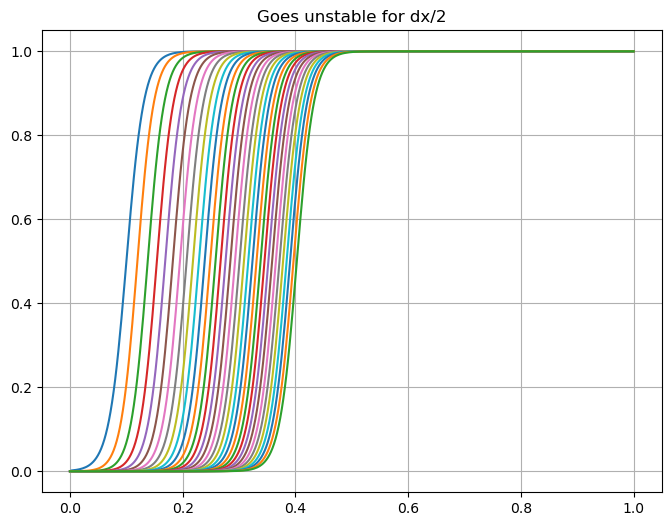

0.0126976


In [7]:
e = (1/64)
Phi_0 = phase_field(T, Phi, e, A, dx, dt, t, x)[1]
T_0 = phase_field(T, Phi, e, A, dx, dt, t, x)[0]
plt.figure(figsize=(8, 6))
plt.plot(x,Phi_0[:,::1000])
plt.title('Goes unstable for dx/2')
plt.grid(True)
plt.show()

print(dt/e**2)

# Anayltical Solutions (For Report)

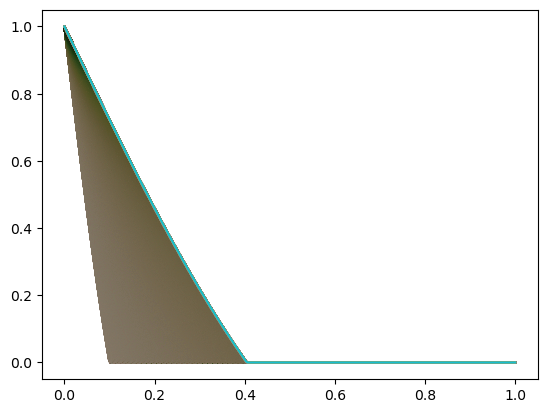

In [10]:
h_a =  2*np.sqrt(t)*lambd
#plt.plot(t, h_a)

T_a = np.zeros([len(x), len(t)])
i=0
while i<len(h_a): 
    h_now = h_a[i]
    mask = x < h_now
    T_a[mask,i] = 1.0 - erf(lambd*x[mask]/h_now)/erf(lambd)
    i = i+1

plt.plot(x, T_a)
plt.show()

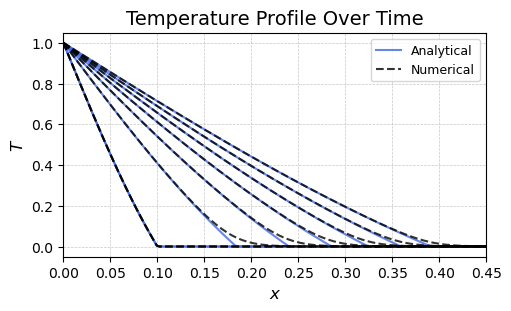

In [12]:
plt.figure(figsize=(5, 3), layout='constrained') # Adjust figure size

# Graph for report
plt.plot(x, T_a[:,0], linewidth=1.5, linestyle="-", color = 'royalblue', label ='Analytical', alpha=0.8)
plt.plot(x, T_a[:,::5000], linewidth=1.5, linestyle="-", color = 'royalblue', alpha=0.8)

plt.plot(x,T_0[:,0],  color = 'black', linestyle = '--', linewidth=1.5, label="Numerical", alpha=0.8)
plt.plot(x,T_0[:,::5000],  color = 'black', linestyle = '--', linewidth=1.5,  alpha=0.8)

# Add grid with styling
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.title('Temperature Profile Over Time', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$T$', fontsize=12)


# Set x-axis limit
plt.xlim(0, 0.45)

# Add a legend
plt.legend(fontsize=9, loc='upper right')
         
#plt.show()
#plt.savefig("Temperature_Profile.png", format="png")
#plt.savefig("Temperature_Profile.pdf", format="pdf")

# Interface Posistion

In [15]:
h_num = np.array([np.interp(0.5, Phi_0[:,i], x) for i in range(Phi_0.shape[1])])

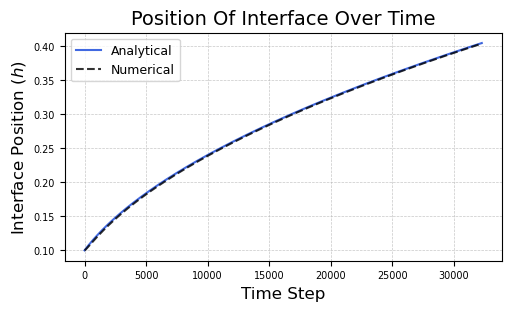

In [17]:
plt.figure(figsize=(5, 3), layout='constrained')

# Plot with custom styling
plt.plot(h_a, color='royalblue', linewidth=1.5, label="Analytical")
plt.plot(h_num, 'k--', linewidth=1.5, alpha=0.8, label="Numerical")

# Labels and Title
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Interface Position ($h$)", fontsize=12)
plt.title("Position Of Interface Over Time", fontsize=14)

# Grid and Ticks
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(fontsize=9, loc="upper left")

plt.tick_params(axis='both', which='major', labelsize=7)
plt.tick_params(axis='both', which='minor', labelsize=7)

#plt.savefig("Interface_Profile.png", format="png")
#plt.savefig("Interface_Profile.pdf", format="pdf")